In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# {"grid.color": ".6", "grid.linestyle": ":"}
sns.set(font_scale = 1.0)
sns.set_style(style = "white")

In [2]:
df = pd.read_csv('/data02/MyArchive/aisteer_3Dencoders/voids_paper_data/output_exp1.csv')

In [3]:
df['${1/r}$'] = 1.0/df['r_fac']
df['t_rec_gpu'] = df['t_filt'] + df['t_mask'] + df['t_backproj']
df['t_rec'] = df['t_cpu2gpu'] + df['t_rec_gpu'] + df['t_gpu2cpu']
df['speedup-rec-gpu'] = df['t_rec_gpu'].iloc[-1]/df['t_rec_gpu']
df['speedup-bp'] = df['t_backproj'].iloc[-1]/df['t_backproj']
df['speedup-rec-net'] = df['t_rec'].iloc[-1]/df['t_rec']

In [4]:
df

,r_fac,ntheta,nz,n,t_cpu2gpu,t_filt,t_mask,t_backproj,t_gpu2cpu,${1/r}$,t_rec_gpu,t_rec,speedup-rec-gpu,speedup-bp,speedup-rec-net
0,0.010000,1500.0,64.0,2048.0,81.489761,39.229313,14.544224,26.638144,8.638976,100.000000,80.411680,170.540418,33.779759,91.655623,20.742695
1,0.016681,1500.0,64.0,2048.0,80.759132,39.225281,14.686208,41.840641,8.099424,59.948425,95.752130,184.610686,28.367904,58.353208,19.161772
2,0.027826,1500.0,64.0,2048.0,80.735970,39.277569,14.992736,67.629059,13.279808,35.938137,121.899364,215.915141,22.283030,36.101872,16.383603
3,0.046416,1500.0,64.0,2048.0,80.937309,39.289345,15.476736,111.234848,39.796898,21.544347,166.000929,286.735136,16.363084,21.949377,12.337058
4,0.077426,1500.0,64.0,2048.0,80.673538,39.262878,20.302015,185.583618,66.920448,12.915497,245.148512,392.742498,11.080170,13.155987,9.007092
5,0.129155,1500.0,64.0,2048.0,80.844963,39.409889,32.427967,313.405426,91.541214,7.742637,385.243282,557.629459,7.050836,7.790343,6.343761
6,0.215443,1500.0,64.0,2048.0,80.842720,39.516384,52.100960,529.656250,184.436539,4.641589,621.273594,886.552853,4.372127,4.609661,3.990138
7,0.359381,1500.0,64.0,2048.0,81.380547,39.503521,85.385567,887.455750,258.534058,2.782559,1012.344837,1352.259441,2.683164,2.751163,2.615968
8,0.599484,1500.0,64.0,2048.0,81.318275,39.598049,142.158112,1483.683350,440.201233,1.668101,1665.439510,2186.959019,1.630973,1.645591,1.617528
9,1.000000,1500.0,64.0,2048.0,80.925377,39.873951,234.877594,2441.535645,740.255310,1.000000,2716.287189,3537.467876,1.000000,1.000000,1.000000


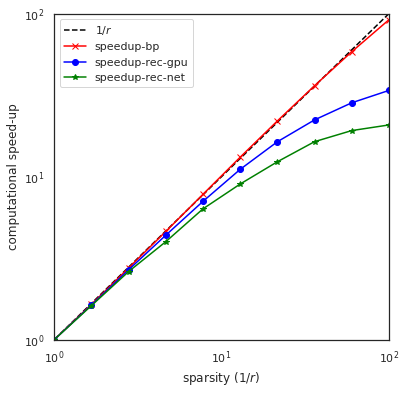

In [5]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['${1/r}$', 'speedup-bp', 'speedup-rec-gpu', 'speedup-rec-net']
colors = ['black', 'red', 'blue', 'green']
markers = ['--', 'x-', 'o-', '*-']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel("computational speed-up")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
ax.set_ylim([1,100])
ax.legend()

In [6]:
df

,r_fac,ntheta,nz,n,t_cpu2gpu,t_filt,t_mask,t_backproj,t_gpu2cpu,${1/r}$,t_rec_gpu,t_rec,speedup-rec-gpu,speedup-bp,speedup-rec-net
0,0.010000,1500.0,64.0,2048.0,81.489761,39.229313,14.544224,26.638144,8.638976,100.000000,80.411680,170.540418,33.779759,91.655623,20.742695
1,0.016681,1500.0,64.0,2048.0,80.759132,39.225281,14.686208,41.840641,8.099424,59.948425,95.752130,184.610686,28.367904,58.353208,19.161772
2,0.027826,1500.0,64.0,2048.0,80.735970,39.277569,14.992736,67.629059,13.279808,35.938137,121.899364,215.915141,22.283030,36.101872,16.383603
3,0.046416,1500.0,64.0,2048.0,80.937309,39.289345,15.476736,111.234848,39.796898,21.544347,166.000929,286.735136,16.363084,21.949377,12.337058
4,0.077426,1500.0,64.0,2048.0,80.673538,39.262878,20.302015,185.583618,66.920448,12.915497,245.148512,392.742498,11.080170,13.155987,9.007092
5,0.129155,1500.0,64.0,2048.0,80.844963,39.409889,32.427967,313.405426,91.541214,7.742637,385.243282,557.629459,7.050836,7.790343,6.343761
6,0.215443,1500.0,64.0,2048.0,80.842720,39.516384,52.100960,529.656250,184.436539,4.641589,621.273594,886.552853,4.372127,4.609661,3.990138
7,0.359381,1500.0,64.0,2048.0,81.380547,39.503521,85.385567,887.455750,258.534058,2.782559,1012.344837,1352.259441,2.683164,2.751163,2.615968
8,0.599484,1500.0,64.0,2048.0,81.318275,39.598049,142.158112,1483.683350,440.201233,1.668101,1665.439510,2186.959019,1.630973,1.645591,1.617528
9,1.000000,1500.0,64.0,2048.0,80.925377,39.873951,234.877594,2441.535645,740.255310,1.000000,2716.287189,3537.467876,1.000000,1.000000,1.000000
